In [1]:
import pandas as pd 
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeRegressor

In [2]:
X = pd.read_csv("all-data.csv").drop("Date", axis=1)

In [3]:
useable_X = X.loc[X["Index"] < len(X)-60]
useable_y = X.loc[X["Index"] > 59]["New Cases"]
predict_X = X.loc[X["Index"] >= len(X) - 60]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(useable_X, useable_y, test_size = 0.3, train_size = .5)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))
print(tree.score(useable_X, useable_y))

1.0
0.5650699830651211
0.7199409221485078


In [9]:
def plot_model(model, X_data, y, predict):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    # ax.scatter(predict["Index"], model.predict(predict))
    ax.plot(predict["Index"], model.predict(predict))
    ax.set_title("Prediction")
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    ax2.scatter(X_data["Index"], y)
    ax2.plot(X_data["Index"], model.predict(X_data))
    ax2.set_title("Training Data")

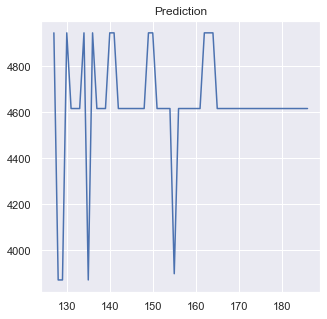

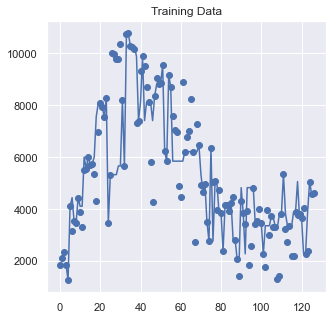

In [10]:
plot_model(tree, useable_X, useable_y, predict_X)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))
print(forest.score(useable_X, useable_y))

0.9531422930457379
0.6057140087953905
0.7800524474297301


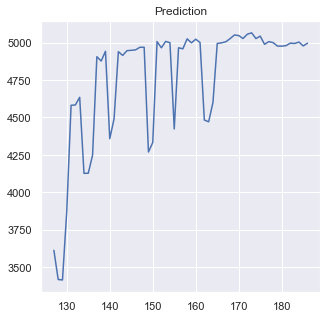

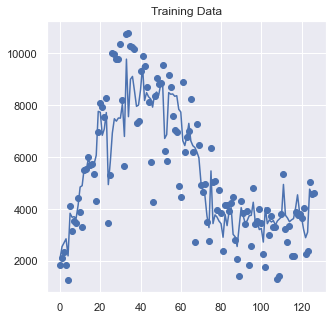

In [14]:
plot_model(forest, useable_X, useable_y, predict_X)

In [15]:
from sklearn.svm import SVR

In [19]:
svr = SVR(kernel='sigmoid')
svr.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [20]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))
print(svr.score(useable_X, useable_y))

-0.05100345319322486
-0.0011139352550837422
-0.03698409897770749


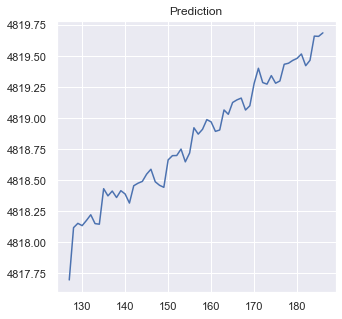

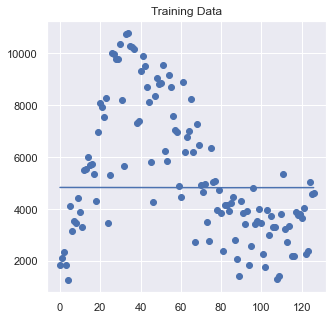

In [21]:
plot_model(svr, useable_X, useable_y, predict_X)

In [22]:
from sklearn.linear_model import SGDRegressor

In [25]:
grad = SGDRegressor(loss='huber')
grad.fit(X_train, y_train)

SGDRegressor(loss='huber')

In [26]:
print(grad.score(X_train, y_train))
print(grad.score(X_test, y_test))
print(grad.score(useable_X, useable_y))

-50.81003626084647
-43.178540651318684
-43.1144053573121


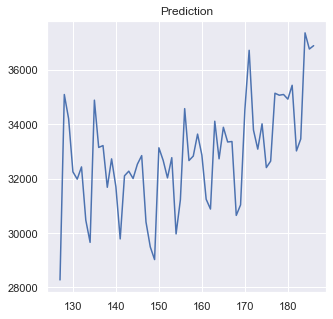

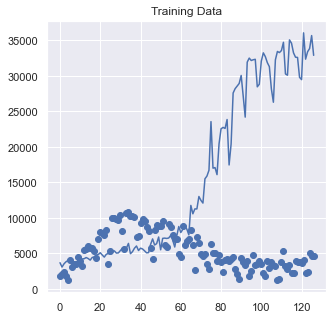

In [27]:
plot_model(grad, useable_X, useable_y, predict_X)

In [28]:
from sklearn.neural_network import MLPRegressor

In [47]:
percept = MLPRegressor(activation="relu", max_iter=1000, solver="lbfgs")
percept.fit(X_train, y_train)

MLPRegressor(max_iter=1000, solver='lbfgs')

In [48]:
print(percept.score(X_train, y_train))
print(percept.score(X_test, y_test))
print(percept.score(useable_X, useable_y))

0.6863175561804868
0.34671454741297925
0.5776832322615885


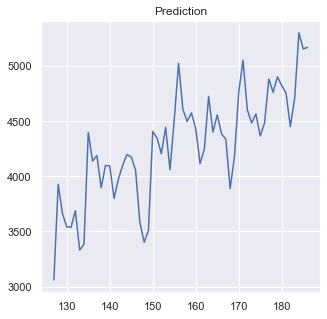

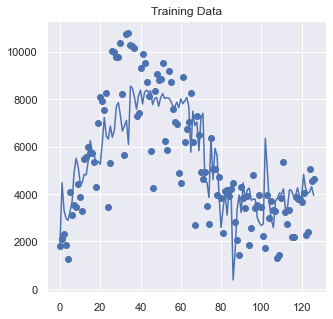

In [49]:
plot_model(percept, useable_X, useable_y, predict_X)